# Demonstration of Graphic facilities in gstlearn package

The module gstlearn.plot contains various plot functions for gstlearn objetcs: DbGrid, Db, Vario, Model, Polygons... These functions are also accesible as methods of each class. For example for a grid, we could use equivalently gp.grid(mygrid,...) or mygrid.plot(...), or for more specific functions: gp.point(mygrid,...) or mygrid.plot_point(...)

In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Import packages

In [9]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import gstlearn as gl
import gstlearn.plot as gp
from scipy import ndimage, misc 

We define the Space dimension

In [10]:
gl.defineDefaultSpace(gl.ESpaceType.RN, 2)
gp.default_working_mode = True

Creating a dummy Model used for simulating a random field and display it

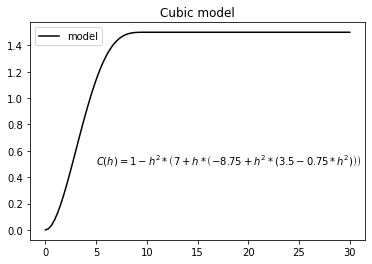

In [11]:
ctxt = gl.CovContext() # use default space
mymodel = gl.Model(ctxt)
cova = gl.CovAniso(gl.ECov.CUBIC,10,1,1.5,mymodel.getContext())
mymodel.addCov(cova)
ax = mymodel.plot(flagLegend=True)
gp.decoration(ax, title="Cubic model")
plt.text(5,0.5,'$%s$'%cova.getFormula(),size='medium')
plt.show()

You can also directly display the formula in an output cell of a notebook

In [12]:
from IPython.display import display, Latex
display(Latex('$%s$'%cova.getFormula()))

<IPython.core.display.Latex object>

## Grid representations

We create a rectangular non-rotated 2-D grid, and simulate random Gaussian field (using the Model previously defined). Two simulations are generated in order to emphasize the graphic posibilities in further parts of this note.

In [13]:
nx = [70,25]
dx = [1,2]
x0 = [-40, 20]
mygrid = gl.DbGrid.create(nx,dx,x0)

err = gl.simtub(None,mygrid,mymodel,None,2)
mygrid.display()


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 5
Maximum Number of UIDs       = 5
Total number of samples      = 1750

Grid characteristics:
---------------------
Origin :    -40.000    20.000
Mesh   :      1.000     2.000
Number :         70        25

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x1 - Locator = x1
Column = 2 - Name = x2 - Locator = x2
Column = 3 - Name = Simu.1 - Locator = z1
Column = 4 - Name = Simu.2 - Locator = z2
 

Add a dummy selection to test visualization with Selection

In [14]:
mygrid["sel"] = 1. - (mygrid["x1"] > 0) * (mygrid["x1"] < 15) * (mygrid["x2"] > 40) * (mygrid["x2"] < 50)
mygrid.setLocator("sel",gl.ELoc.SEL)

### Non Rotated Grid

We simply represent the grid (using the defaulted color scale). We also plot the legend on the right edge.  

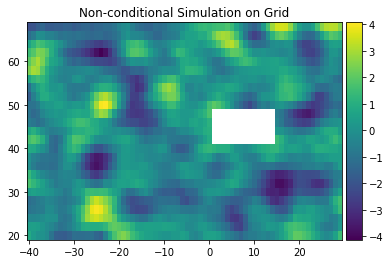

In [15]:
ax = gp.grid(mygrid)
ax.decoration(title="Non-conditional Simulation on Grid")

This Can be specified using the object-based syntax instead, as follows:

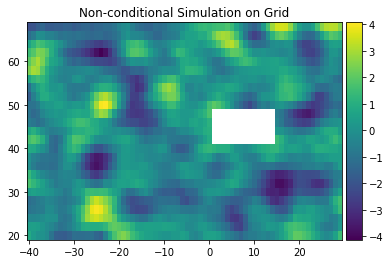

In [16]:
ax = mygrid.plot()
ax.decoration(title="Non-conditional Simulation on Grid")

We can overlay a set of isolines

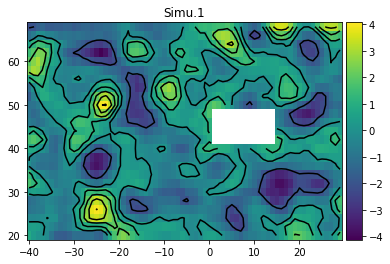

In [17]:
ax = mygrid.plot(levels=[-2,0,1,2,3,4,5,6,7,8]) 

As a proof, we can also visualize the (last) variable using a Color Point representation. Note that here we **cannot** use the object-based convention as we wish to use the *point* representation facility, even if the file is organized as a grid.  

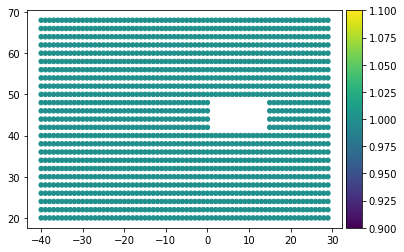

In [18]:
ax = gp.point(mygrid,color_name=mygrid.getLastName()) # last name is the selection

We can create a specific ColorScale, containing a limited number of colors, and sampling a given reference Color Scale. 

For the next figure, we use the one defaulted by the system ('viridis') for sake of understanding. We simply reduce the number of colors

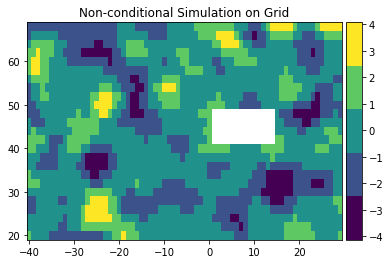

In [20]:
cmap = gp.get_cmap(5,'viridis')
ax = mygrid.plot(cmap=cmap)
ax.decoration(title="Non-conditional Simulation on Grid")

We can also change the reference color scale (using the one defaulted by the method get_cmap for example: 'gist rainbow') and increase the number of colors

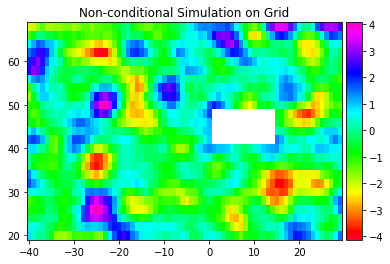

In [22]:
cmap = gp.get_cmap(100)
ax = mygrid.plot(cmap=cmap)
ax.decoration(title="Non-conditional Simulation on Grid")

Represent the histogram of the vaalues collected in the outcome over the grid. Here we can use either gp.hist(mygrid,...) or mygrid.plot_hist(...)

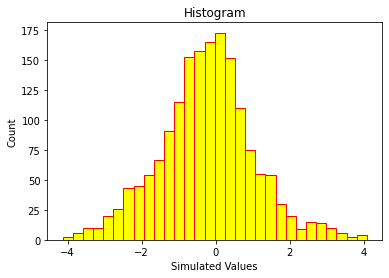

In [23]:
ax = mygrid.plot_hist("Simu.1")
ax.decoration(xlabel="Simulated Values",ylabel="Count",title="Histogram")

Representing a scatter plot between two variables stored on the same Db

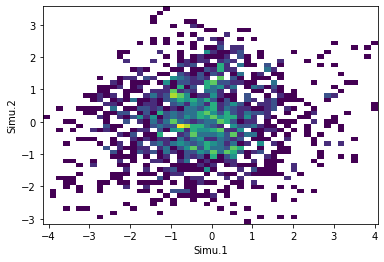

In [24]:
ax = mygrid.plot_correlation("Simu.1","Simu.2")

### Set of Points and Polygon

A set of points is sampled from the previous Grid and stored in a new Point Db. The number of samples if fixed to 1% of the number of grid nodes.

In [25]:
mypoint = gl.Db()
mypoint.resetSamplingDb(mygrid,0.01)
mypoint.display()


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 6
Maximum Number of UIDs       = 6
Total number of samples      = 17
Number of active samples     = 17

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x1 - Locator = x1
Column = 2 - Name = x2 - Locator = x2
Column = 3 - Name = Simu.1 - Locator = z1
Column = 4 - Name = Simu.2 - Locator = z2
Column = 5 - Name = sel - Locator = sel
 

We create a polygon as the convex hull of the samples

In [26]:
mypoly = gl.Polygons.createFromDb(mypoint)

We now display the points and the polygon on top of the grid: the overlay is ensured by sugint eh argument 'ax'.

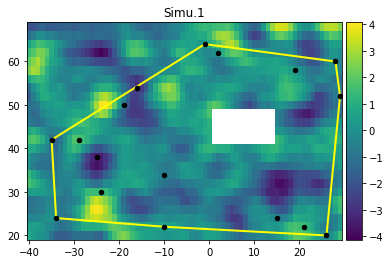

In [27]:
ax = gp.grid(mygrid)
ax = gp.polygon(mypoly,flagFace=False, edgeColor='yellow', ax=ax)
ax = gp.point(mypoint,color="black", ax=ax)

### Rotated grid (angle = 20 degrees)

We create the same grid as before but with a rotation of 20 degrees.

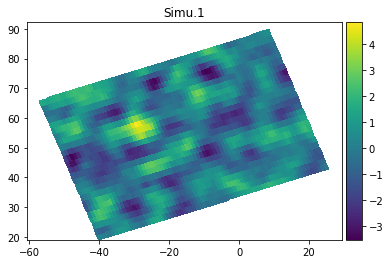

In [28]:
mygrid = gl.DbGrid.create(nx,dx,x0,[20,0])
err = gl.simtub(None,mygrid,mymodel,None,2)
ax = gp.grid(mygrid)

A new set of Points is sampled from the rotated Grid. As the same seed is used, the ranks of the selected samples within the grid are the same. Furthermore, we generate the Polygon as the convex hull of the newly created Point db.

In [29]:
mypoint = gl.Db()
mypoint.resetSamplingDb(mygrid,0.01)
mypoly = gl.Polygons.createFromDb(mypoint)

We represent again the three components (grid, points and polygon) on the same view

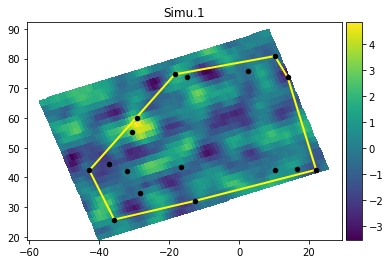

In [30]:
ax = mygrid.plot()
ax = mypoly.plot(flagFace=False,edgeColor='yellow',ax=ax)
ax = mypoint.plot(color="black",ax=ax)

Let us now add a selection in order to restrict the previous representation to the only non-masked samples

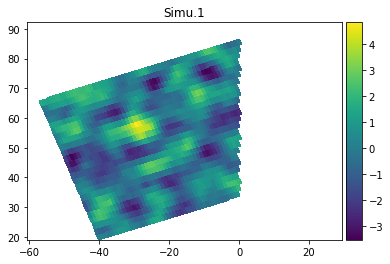

In [31]:
tab = mygrid.getColumn("x1")
sel = (np.asarray(tab) < 0).astype(float)
mygrid.addSelection(tuple(sel),'sel')
ax = gp.grid(mygrid,name="Simu.1",usesel=True)

## Share legend between two plots
This paragraph is meant to present the possibility of splitting a figure in two scenes, to represent a grid in each scene (for example) and share the (same) color scale for the two scenes.

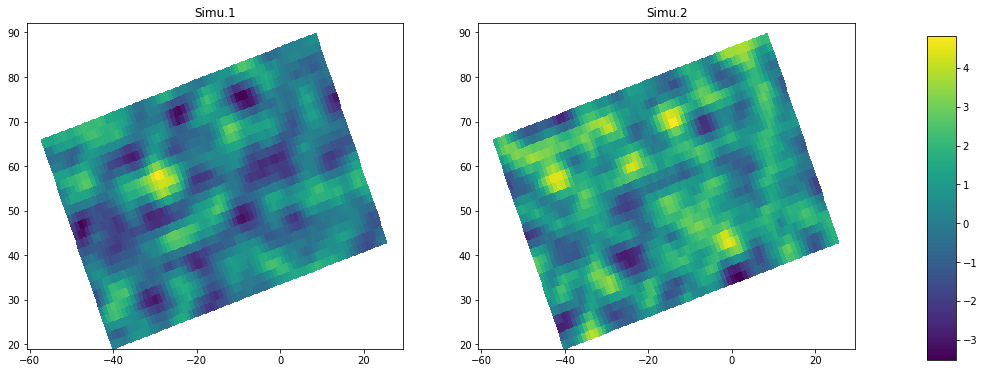

In [32]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1,2,1)
gp.grid(mygrid,name="Simu.1", usesel=False, flagLegendColor = False, ax=ax1, end_plot=False)
ax2 = fig.add_subplot(1,2,2)
gp.grid(mygrid,name="Simu.2", usesel=False, flagLegendColor = False, ax=ax2, end_plot=False)

fig.subplots_adjust(right=0.7)
cbar_ax = fig.add_axes([0.75, 0.1, 0.02, 0.75])

im = ax.collections[0] # get mappable described by the colorbar
err = fig.colorbar(im, cax = cbar_ax)

## Display points with fixed colors

In this paragraph, we wish to display sample points with given colors. 

In [33]:
tab = [1., 1., 1., 2., 2., 3., 3., 3., 5.]
dat1 = gl.Db.createFromSamples(3, gl.ELoadBy.SAMPLE, tab, ["x","y","z"], ["x1","x2","z"])
dbfmt = gl.DbStringFormat()
dbfmt.setFlags(flag_resume=True, flag_array=True)
dat1.display(dbfmt)


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 4
Maximum Number of UIDs       = 4
Total number of samples      = 3

Data Base Contents
------------------
                 rank         x         y         z
     [  0,]     1.000     1.000     1.000     1.000
     [  1,]     2.000     2.000     2.000     3.000
     [  2,]     3.000     3.000     3.000     5.000

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x - Locator = x1
Column = 2 - Name = y - Locator = x2
Column = 3 - Name = z - Locator = z1
 

We represent the samples without using any pre-specified color map. The system uses the default color scale and assigns the lowest value to be represented to the first color and the largest value to the last color.

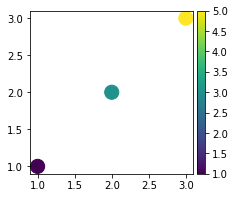

In [34]:
ax = gp.point(dat1,color_name="z",size=200)
ax.geometry(1, size=[4,3])

Representing using a given color map (based on few colors [5]). The color scale is now discrete but the system still assigns the lowest value (i.e. 1) to the first color and the largest value (i.e. 5) to the last color

In [ ]:
ncol = 5
cmap = gp.get_cmap(ncol)

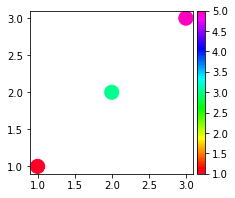

In [35]:
ax = gp.point(dat1,color_name="z",size=200,cmap=cmap)
ax.geometry(1, size=[4,3])

We use a new Db where the values at first sample has been modified (from 1 to 4) while the other have been left unchanged. We use the same color scale as before. Again the lowest value (i.e. 3) is assigned to the first color and the largest value (i.e. 5) to the last color.

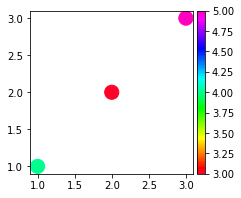

In [36]:
tab = [1., 1., 4., 2., 2., 3., 3., 3., 5.]
dat2 = gl.Db.createFromSamples(3, gl.ELoadBy.SAMPLE, tab, ["x","y","z"], ["x1","x2","z"])
ax = gp.point(dat2,color_name="z",size=200,cmap=cmap)
ax.geometry(1, size=[4,3])

We want to perform the same graphic again but setting the first and last value of the color scale explicitely

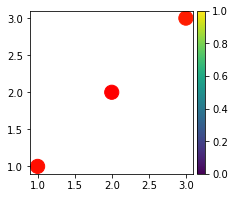

In [37]:
ax = gp.point(dat2,color_name="z",size=200,cmap=cmap,directColor=True)
ax.geometry(1, size=[4,3])

# Superimposing figures

In this section, we demonstrate the possibilities offered by the graphics for working with multiple figures and overlaying graphics. This is described through the use of variograms and models.
For this reason we consider the two non-conditional simulations created earllier on the existing grid. We calculate the simple and cross variograms along the two main axes of the grid and fit a model automatically.

In [38]:
varioparam = gl.VarioParam()
dirs = gl.DirParam.createMultipleFromGrid(10)
varioparam.addMultiDirs(dirs)
vario = gl.Vario(varioparam, mygrid)
err = vario.compute(gl.ECalcVario.VARIOGRAM)

In [39]:
ctxt = gl.CovContext() # use default space
model = gl.Model(ctxt)
model.fit(vario,[gl.ECov.CUBIC])
model.display()


Model characteristics
Space dimension              = 2
Number of variable(s)        = 2
Number of basic structure(s) = 1
Number of drift function(s)  = 0
Number of drift equation(s)  = 0

Covariance Part
---------------
Cubic
- Sill matrix:
               [,  0]    [,  1]
     [  0,]     1.990     0.072
     [  1,]     0.072     1.333
- Ranges       =      8.926     9.000
Total Sill
               [,  0]    [,  1]
     [  0,]     1.990     0.072
     [  1,]     0.072     1.333

 

### Several ways for displaying experimental variograms

In the next graphic, we produce the simple variogram of the first variable calculated in the first direction

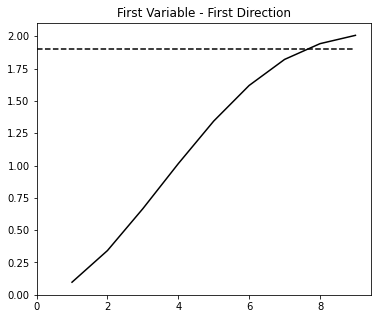

In [40]:
ax = gp.varioElem(vario)
ax.geometry(0, size=[6,5])
ax.decoration(title="First Variable - First Direction")

In the next graphic, we produce a single figure where the variograms of the first variable calculated in the first direction (black) and the second direction (red) are overlaid. The overlay is performed manually.

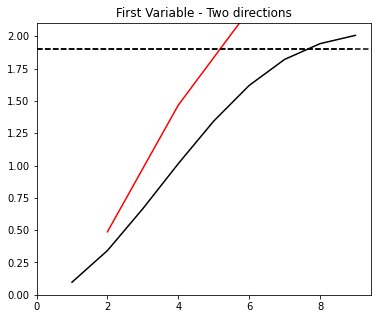

In [41]:
ax = gp.varioElem(vario)
ax.decoration(title="First Variable - Two directions")
ax.geometry(0, size=[6,5])
ax = vario.plot_varioElem(idir=1,color='red',ax=ax)

In the next graphic, we produce a single graphic where the cross-variograms between first and second variables are displayed for all directions. The colors are extracted from the Color Map provided as argument.

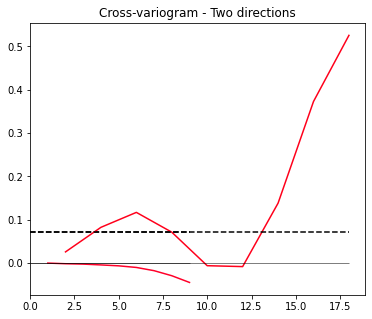

In [42]:
ax = vario.plot_varioDir(ivar=1,jvar=0,cmap=cmap)
ax.decoration(title="Cross-variogram - Two directions")
ax.geometry(0, size=[6,5])

Representing all simple and cross variograms for all directions

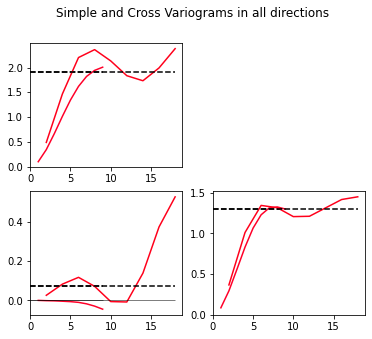

In [66]:
axs = gp.vario(vario,cmap=cmap)
gp.decoration(axs,title="Simple and Cross Variograms in all directions")
gp.geometry(axs, 0, size=[6,5])

### Several ways for representing the Model

Represent the Model calculated for the second variable in the first direction

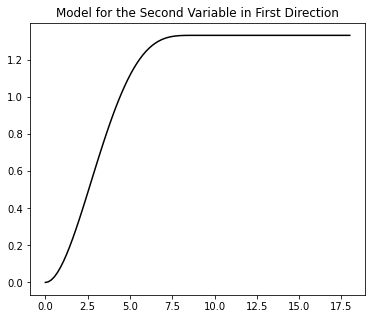

In [67]:
ax = gp.model(model,ivar=1,jvar=1,codir=vario.getCodirs(0),hmax = vario.getHmax())
ax.decoration(title="Model for the Second Variable in First Direction")
ax.geometry(0, size=[6,5])

Representing all simple and cross variograms together with the fitted model for the first direction

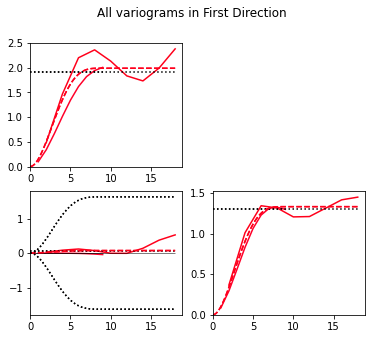

In [68]:
axs = gp.varmod(vario, model, cmap=cmap)
gp.decoration(axs, title="All variograms in First Direction")
gp.geometry(axs, 0, size=[6,5])

### Testing figure Overlay

The next figure is meant to demonstrate the overlay possibilities. We first represent the experimental variograms for all variable (in the first direction only to be legible). Then we overlay the model ... only over the experimental simple variogram of the second variable (in dashed blue).

In [ ]:
axs = vario.plot(idir=0,cmap=cmap)
gp.decoration(axs, title="Overlay test")
gp.geometry(axs, 0, size=[6,5])
ax = model.plot(ivar=1,jvar=1,codir=vario.getCodirs(0),hmax = vario.getHmax(),
                linestyle = 'dashed', color='blue',ax=axs[1,1])

In the next figure, we draw the first direction and overlay the second direction (on purpose using two orders)

In [ ]:
axs = vario.plot(idir=0,cmap=cmap)
gp.decoration(axs, title="Overlay test")
gp.geometry(axs, 0, size=[4,3])
axs = vario.plot(idir=1,axs=axs)

## Interactive samples selection

An interactive selection can be made on the figures, either by selecting points directly (with a gp.point), or selecting all the points inside a polygon. If a Db (or DbGrid) is provided, a new variable "interactive_selection" is created. In Jupyter Notebook, interactive plots require to use %matplotlib notebook

In [ ]:
%matplotlib notebook

ax = mygrid.plot_point()
select = gp.PolygonSelection(ax=ax, mydb = mygrid)

In [ ]:
ax = mygrid.plot("interactive_selection")

In [ ]:
ax = mygrid.plot_correlation("Simu.1", "Simu.2", asPoint=True)
select = gp.PointSelection(ax = ax, mydb = mygrid, pickradius = 3, color = 'r')

In [ ]:
ax = mygrid.plot("interactive_selection")